<a href="https://colab.research.google.com/github/shivi13102/Vehicles_Efficiency_Rate_Prediction/blob/main/Cleanin_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Load the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# TRAIN DATA CLEANING

In [62]:
display(train)

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,GEARBOX_TYPE,OUTPUT,BODY_STYLE,EFFICIENCY_RATIO,YEARS_IN_SERVICE,MILEAGE,HIGHWAY_USAGE,ENERGY_SOURCE,EFFICIENCY_RATING
0,0,74.595588,149.0,8.3,2.0,5.0,4.0,7.9,Manual,87.0,COMPACT,1.60,10.0,17.0,5.6,Petrol,39.0
1,1,62.338357,262.0,22.5,3.6,15.0,6.0,16.5,Automatic,163.0,SUV - SMALL,1.52,10.0,19.0,12.3,Petrol,23.0
2,2,72.105592,204.0,11.7,2.8,5.0,6.0,10.0,Automatic,172.0,MID-SIZE,1.59,10.0,18.0,10.4,Gas,30.0
3,3,86.706104,301.0,23.4,5.7,14.0,8.0,13.9,Automatic,286.0,PICKUP TRUCK - STANDARD,1.42,10.0,19.0,13.6,Petrol,28.0
4,4,104.793985,375.0,20.5,2.2,5.0,4.0,11.9,Manual,118.0,MID-SIZE,1.54,10.0,19.0,9.7,Petrol,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,113.241839,311.0,16.1,5.1,7.0,6.0,9.6,Automatic,264.0,MID-SIZE,1.31,10.0,19.0,7.3,Petrol,27.0
4996,4996,103.952918,286.0,18.5,3.5,7.0,8.0,15.1,Automatic,266.0,FULL-SIZE,1.47,10.0,17.0,12.9,Petrol,20.0
4997,4997,64.741667,225.0,10.5,1.4,4.0,4.0,6.1,Automatic,87.0,MID-SIZE,1.33,10.0,17.0,6.8,Diesel,31.0
4998,4998,78.366368,233.0,9.8,3.1,5.0,4.0,8.7,Automatic,115.0,MID-SIZE,1.63,10.0,16.0,7.0,Gas,33.0


In [63]:
print("Training Data Info:")
print(train.info())
print("\nMissing Values:\n", train.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   PERFORMANCE_INDEX    4981 non-null   float64
 2   EMISSIONS_CO2        4995 non-null   float64
 3   URBAN_CONSUMPTION    4996 non-null   float64
 4   DISPLACEMENT         4994 non-null   float64
 5   CAPACITY             4999 non-null   float64
 6   PISTON_COUNT         4993 non-null   float64
 7   BLENDED_CONSUMPTION  4996 non-null   float64
 8   GEARBOX_TYPE         5000 non-null   object 
 9   OUTPUT               4998 non-null   float64
 10  BODY_STYLE           5000 non-null   object 
 11  EFFICIENCY_RATIO     4996 non-null   float64
 12  YEARS_IN_SERVICE     4998 non-null   float64
 13  MILEAGE              4995 non-null   float64
 14  HIGHWAY_USAGE        4995 non-null   float64
 15  ENERGY_SOURCE     

### Handling Missing Values:

In [64]:
# Columns for different imputation strategies
mean_cols = ['PERFORMANCE_INDEX', 'CAPACITY', 'EFFICIENCY_RATIO']
median_cols = ['EMISSIONS_CO2', 'URBAN_CONSUMPTION', 'DISPLACEMENT',
               'BLENDED_CONSUMPTION', 'OUTPUT', 'YEARS_IN_SERVICE',
               'MILEAGE', 'HIGHWAY_USAGE']
mode_cols = ['PISTON_COUNT']

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
train[mean_cols] = mean_imputer.fit_transform(train[mean_cols])

# Median imputation
median_imputer = SimpleImputer(strategy='median')
train[median_cols] = median_imputer.fit_transform(train[median_cols])

# Mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
train[mode_cols] = mode_imputer.fit_transform(train[mode_cols])

# Verifying missing values after imputation
print("Missing values after imputation:\n", train.isnull().sum())

Missing values after imputation:
 ID                     0
PERFORMANCE_INDEX      0
EMISSIONS_CO2          0
URBAN_CONSUMPTION      0
DISPLACEMENT           0
CAPACITY               0
PISTON_COUNT           0
BLENDED_CONSUMPTION    0
GEARBOX_TYPE           0
OUTPUT                 0
BODY_STYLE             0
EFFICIENCY_RATIO       0
YEARS_IN_SERVICE       0
MILEAGE                0
HIGHWAY_USAGE          0
ENERGY_SOURCE          0
EFFICIENCY_RATING      0
dtype: int64


In [65]:
# Calculate the mode of the 'ENERGY_SOURCE' column
mode_value = train['ENERGY_SOURCE'].mode()[0]

# Replace occurrences of "247234.3039" with the mode value
train['ENERGY_SOURCE'] = train['ENERGY_SOURCE'].replace('"247234.3039"', mode_value)

# Verify the change by checking the unique values again
print("Updated unique values in 'ENERGY_SOURCE':", train['ENERGY_SOURCE'].unique())

Updated unique values in 'ENERGY_SOURCE': ['Petrol' 'Gas' 'Diesel']


### One-Hot Encoding:

In [66]:
# Display unique values for specified columns
print("Unique values in 'GEARBOX_TYPE':", train['GEARBOX_TYPE'].unique())
print("Unique values in 'BODY_STYLE':", train['BODY_STYLE'].unique())
print("Unique values in 'ENERGY_SOURCE':", train['ENERGY_SOURCE'].unique())

Unique values in 'GEARBOX_TYPE': ['Manual' 'Automatic' 'eMr']
Unique values in 'BODY_STYLE': ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'PICKUP TRUCK - STANDARD' 'TWO-SEATER'
 'FULL-SIZE' 'MINICOMPACT' 'MINIVAN' 'SUBCOMPACT' 'SUV - STANDARD'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - SMALL' 'VAN - CARGO'
 'VAN - PASSENGER' 'STATION WAGON - MID-SIZE' 'PICKUP TRUCK - SMALL']
Unique values in 'ENERGY_SOURCE': ['Petrol' 'Gas' 'Diesel']


In [67]:
categorical_cols = ['GEARBOX_TYPE', 'BODY_STYLE', 'ENERGY_SOURCE']

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = pd.DataFrame(encoder.fit_transform(train[categorical_cols]))

# Add back column names to the encoded dataframe
encoded_train.columns = encoder.get_feature_names_out(categorical_cols)

# Drop the original categorical columns and concatenate the encoded ones
train = train.drop(columns=categorical_cols).reset_index(drop=True)
train = pd.concat([train, encoded_train], axis=1)

display("Data after one-hot encoding:", train.head())

'Data after one-hot encoding:'

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,...,BODY_STYLE_STATION WAGON - SMALL,BODY_STYLE_SUBCOMPACT,BODY_STYLE_SUV - SMALL,BODY_STYLE_SUV - STANDARD,BODY_STYLE_TWO-SEATER,BODY_STYLE_VAN - CARGO,BODY_STYLE_VAN - PASSENGER,ENERGY_SOURCE_Diesel,ENERGY_SOURCE_Gas,ENERGY_SOURCE_Petrol
0,0,74.595588,149.0,8.3,2.0,5.0,4.0,7.9,87.0,1.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,62.338357,262.0,22.5,3.6,15.0,6.0,16.5,163.0,1.52,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,72.105592,204.0,11.7,2.8,5.0,6.0,10.0,172.0,1.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,86.706104,301.0,23.4,5.7,14.0,8.0,13.9,286.0,1.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,104.793985,375.0,20.5,2.2,5.0,4.0,11.9,118.0,1.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Normalization

In [77]:
# Columns to normalize
columns_to_normalize = [
    'PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
    'DISPLACEMENT', 'CAPACITY', 'BLENDED_CONSUMPTION', 'OUTPUT',
    'EFFICIENCY_RATIO', 'MILEAGE', 'HIGHWAY_USAGE'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the specified columns
train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])

# Verify the result by checking the first few rows
display(train[columns_to_normalize].head())

,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,MILEAGE,HIGHWAY_USAGE
0,0.196465,0.113260,0.144531,0.166667,0.1875,0.151659,0.112805,0.811111,0.35,0.044872
1,0.124786,0.425414,0.699219,0.433333,0.8125,0.559242,0.344512,0.722222,0.45,0.474359
2,0.181904,0.265193,0.277344,0.300000,0.1875,0.251185,0.371951,0.800000,0.40,0.352564
3,0.267287,0.533149,0.734375,0.783333,0.7500,0.436019,0.719512,0.611111,0.45,0.557692
4,0.373064,0.737569,0.621094,0.200000,0.1875,0.341232,0.207317,0.744444,0.45,0.307692


### Outliers:

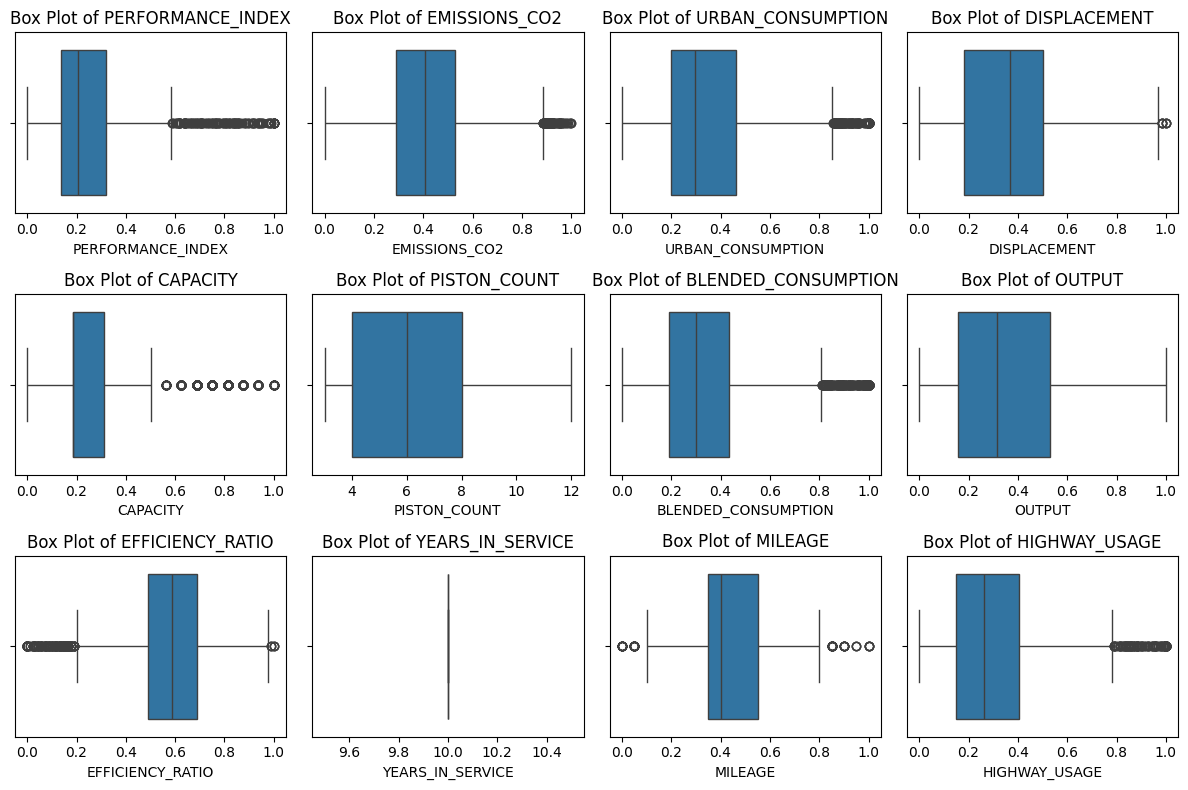

In [82]:
# Columns to check for outliers
columns_to_check = ['PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
                   'DISPLACEMENT', 'CAPACITY', 'PISTON_COUNT',
                   'BLENDED_CONSUMPTION', 'OUTPUT', 'EFFICIENCY_RATIO',
                   'YEARS_IN_SERVICE', 'MILEAGE', 'HIGHWAY_USAGE']

# Create a box plot for each column to visualize outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)  # Create subplots in a grid of 3 rows and 4 columns
    sns.boxplot(x=train[col])  # Create a boxplot for the column
    plt.title(f'Box Plot of {col}')  # Title for each plot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [83]:
# Function to detect and count outliers using IQR method
def count_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

        # Store outlier count for the column
        outlier_counts[col] = outlier_count

    return outlier_counts

# Count outliers in the specified columns
outlier_counts = count_outliers(train, columns_to_check)

# Display the number of outliers in each column
for col, count in outlier_counts.items():
    print(f"Number of outliers in '{col}': {count}")

Number of outliers in 'PERFORMANCE_INDEX': 154
Number of outliers in 'EMISSIONS_CO2': 88
Number of outliers in 'URBAN_CONSUMPTION': 150
Number of outliers in 'DISPLACEMENT': 9
Number of outliers in 'CAPACITY': 890
Number of outliers in 'PISTON_COUNT': 0
Number of outliers in 'BLENDED_CONSUMPTION': 250
Number of outliers in 'OUTPUT': 0
Number of outliers in 'EFFICIENCY_RATIO': 216
Number of outliers in 'YEARS_IN_SERVICE': 0
Number of outliers in 'MILEAGE': 76
Number of outliers in 'HIGHWAY_USAGE': 156


# TEST DATA CLEANING

In [70]:
print("Training Data Info:")
print(test.info())
print("\nMissing Values:\n", test.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2000 non-null   int64  
 1   PERFORMANCE_INDEX    1997 non-null   float64
 2   EMISSIONS_CO2        2000 non-null   float64
 3   URBAN_CONSUMPTION    1998 non-null   float64
 4   DISPLACEMENT         1997 non-null   float64
 5   CAPACITY             2000 non-null   float64
 6   PISTON_COUNT         1999 non-null   float64
 7   BLENDED_CONSUMPTION  2000 non-null   float64
 8   GEARBOX_TYPE         2000 non-null   object 
 9   OUTPUT               1999 non-null   float64
 10  BODY_STYLE           2000 non-null   object 
 11  EFFICIENCY_RATIO     1996 non-null   float64
 12  YEARS_IN_SERVICE     1999 non-null   float64
 13  MILEAGE              2000 non-null   float64
 14  HIGHWAY_USAGE        1997 non-null   float64
 15  ENERGY_SOURCE     

### Handling Missing Values:

In [71]:
# Columns for different imputation strategies
mean_cols = ['PERFORMANCE_INDEX', 'EFFICIENCY_RATIO']
median_cols = ['URBAN_CONSUMPTION', 'DISPLACEMENT', 'OUTPUT', 'YEARS_IN_SERVICE', 'HIGHWAY_USAGE']
mode_cols = ['PISTON_COUNT']

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
test[mean_cols] = mean_imputer.fit_transform(test[mean_cols])

# Median imputation
median_imputer = SimpleImputer(strategy='median')
test[median_cols] = median_imputer.fit_transform(test[median_cols])

# Mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
test[mode_cols] = mode_imputer.fit_transform(test[mode_cols])

# Verifying missing values after imputation
print("Missing values after imputation:\n", test.isnull().sum())

Missing values after imputation:
 ID                     0
PERFORMANCE_INDEX      0
EMISSIONS_CO2          0
URBAN_CONSUMPTION      0
DISPLACEMENT           0
CAPACITY               0
PISTON_COUNT           0
BLENDED_CONSUMPTION    0
GEARBOX_TYPE           0
OUTPUT                 0
BODY_STYLE             0
EFFICIENCY_RATIO       0
YEARS_IN_SERVICE       0
MILEAGE                0
HIGHWAY_USAGE          0
ENERGY_SOURCE          0
dtype: int64


In [72]:
# Find the mode value of the 'ENERGY_SOURCE' column
mode_value = test['ENERGY_SOURCE'].mode()[0]

# Replace specific values with the mode
test['ENERGY_SOURCE'] = test['ENERGY_SOURCE'].replace(["18748'", "14235'"], mode_value)

# Verify the changes by displaying the unique values in 'ENERGY_SOURCE'
print("Unique values in 'ENERGY_SOURCE' after replacement:", test['ENERGY_SOURCE'].unique())

Unique values in 'ENERGY_SOURCE' after replacement: ['Petrol' 'Gas' 'Diesel']


### One-Hot Encoding:

In [73]:
# Display unique values for specified columns
print("Unique values in 'GEARBOX_TYPE':", test['GEARBOX_TYPE'].unique())
print("Unique values in 'BODY_STYLE':", test['BODY_STYLE'].unique())
print("Unique values in 'ENERGY_SOURCE':", test['ENERGY_SOURCE'].unique())

Unique values in 'GEARBOX_TYPE': ['Automatic' 'Manual' 'eMr']
Unique values in 'BODY_STYLE': ['SUV - SMALL' 'COMPACT' 'SUV - STANDARD' 'SUBCOMPACT' 'MINICOMPACT'
 'MID-SIZE' 'PICKUP TRUCK - STANDARD' 'TWO-SEATER' 'FULL-SIZE' 'MINIVAN'
 'STATION WAGON - SMALL' 'VAN - CARGO' 'PICKUP TRUCK - SMALL'
 'VAN - PASSENGER' 'STATION WAGON - MID-SIZE' 'SPECIAL PURPOSE VEHICLE']
Unique values in 'ENERGY_SOURCE': ['Petrol' 'Gas' 'Diesel']


In [74]:
categorical_cols = ['GEARBOX_TYPE', 'BODY_STYLE', 'ENERGY_SOURCE']

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_test = pd.DataFrame(encoder.fit_transform(test[categorical_cols]))

# Add back column names to the encoded dataframe
encoded_test.columns = encoder.get_feature_names_out(categorical_cols)

# Drop the original categorical columns and concatenate the encoded ones
test = test.drop(columns=categorical_cols).reset_index(drop=True)
test = pd.concat([test, encoded_train], axis=1)

display("Data after one-hot encoding:", test.head())

'Data after one-hot encoding:'

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,...,BODY_STYLE_STATION WAGON - SMALL,BODY_STYLE_SUBCOMPACT,BODY_STYLE_SUV - SMALL,BODY_STYLE_SUV - STANDARD,BODY_STYLE_TWO-SEATER,BODY_STYLE_VAN - CARGO,BODY_STYLE_VAN - PASSENGER,ENERGY_SOURCE_Diesel,ENERGY_SOURCE_Gas,ENERGY_SOURCE_Petrol
0,3100.0,94.076083,225.0,25.8,3.6,4.0,4.0,16.2,156.0,1.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3101.0,112.582723,224.0,11.6,1.4,5.0,4.0,7.7,97.0,1.37,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3102.0,84.515804,254.0,13.0,3.6,7.0,6.0,10.1,156.0,1.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3103.0,202.285949,232.0,10.3,2.4,13.0,4.0,10.9,111.0,1.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3104.0,63.658044,203.0,10.2,1.6,4.0,6.0,8.8,171.0,1.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Normalization

In [78]:
# Columns to normalize
columns_to_normalize = [
    'PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
    'DISPLACEMENT', 'CAPACITY', 'BLENDED_CONSUMPTION', 'OUTPUT',
    'EFFICIENCY_RATIO', 'MILEAGE', 'HIGHWAY_USAGE'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the specified columns
test[columns_to_normalize] = scaler.fit_transform(test[columns_to_normalize])

# Verify the result by checking the first few rows
display(test[columns_to_normalize].head())

,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,MILEAGE,HIGHWAY_USAGE
0,0.310386,0.326816,0.828125,0.440678,0.1250,0.538462,0.323171,0.566667,0.30,0.237179
1,0.418612,0.324022,0.273438,0.067797,0.1875,0.129808,0.143293,0.555556,0.35,0.173077
2,0.254478,0.407821,0.328125,0.440678,0.3125,0.245192,0.323171,0.477778,0.45,1.000000
3,0.943193,0.346369,0.222656,0.237288,0.6875,0.283654,0.185976,0.544444,0.55,0.211538
4,0.132503,0.265363,0.218750,0.101695,0.1250,0.182692,0.368902,0.488889,0.40,0.224359


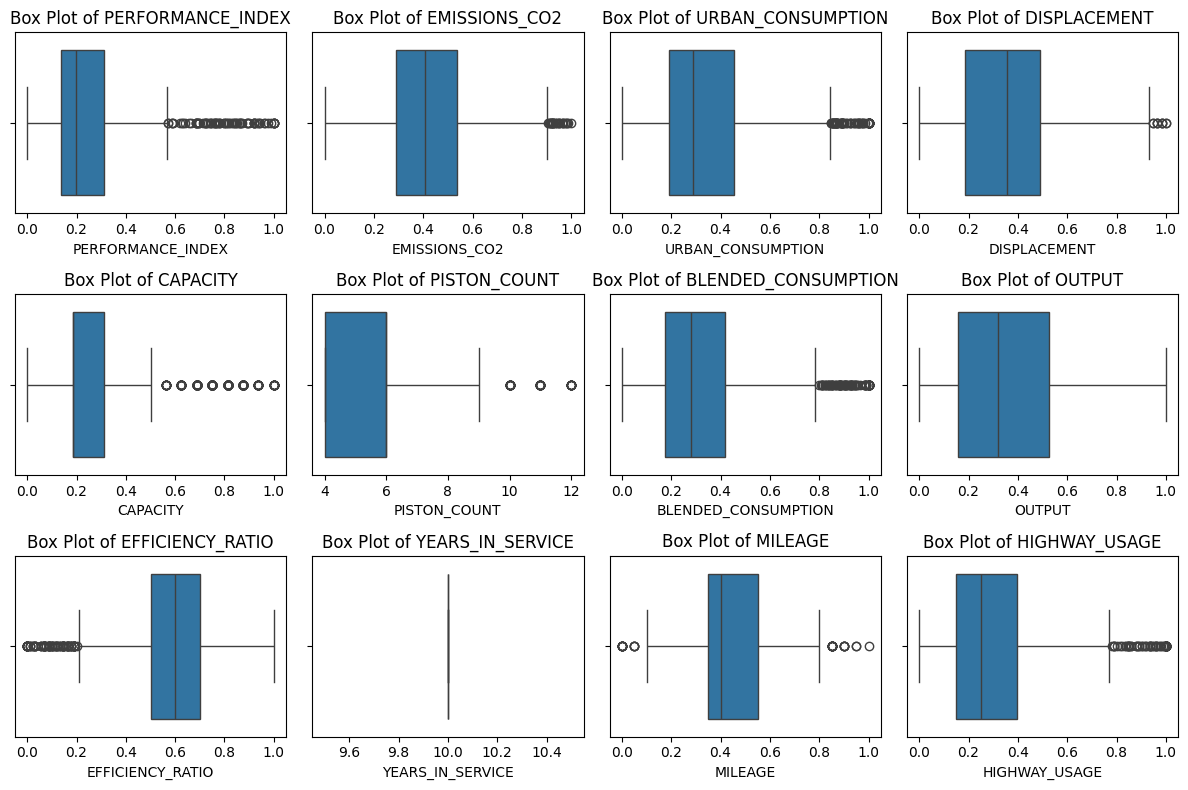

In [84]:
# Columns to check for outliers
columns_to_check = ['PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
                   'DISPLACEMENT', 'CAPACITY', 'PISTON_COUNT',
                   'BLENDED_CONSUMPTION', 'OUTPUT', 'EFFICIENCY_RATIO',
                   'YEARS_IN_SERVICE', 'MILEAGE', 'HIGHWAY_USAGE']

# Create a box plot for each column to visualize outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)  # Create subplots in a grid of 3 rows and 4 columns
    sns.boxplot(x=test[col])  # Create a boxplot for the column
    plt.title(f'Box Plot of {col}')  # Title for each plot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [85]:
# Function to detect and count outliers using IQR method
def count_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

        # Store outlier count for the column
        outlier_counts[col] = outlier_count

    return outlier_counts

# Count outliers in the specified columns
outlier_counts = count_outliers(test, columns_to_check)

# Display the number of outliers in each column
for col, count in outlier_counts.items():
    print(f"Number of outliers in '{col}': {count}")

Number of outliers in 'PERFORMANCE_INDEX': 75
Number of outliers in 'EMISSIONS_CO2': 25
Number of outliers in 'URBAN_CONSUMPTION': 72
Number of outliers in 'DISPLACEMENT': 10
Number of outliers in 'CAPACITY': 376
Number of outliers in 'PISTON_COUNT': 59
Number of outliers in 'BLENDED_CONSUMPTION': 96
Number of outliers in 'OUTPUT': 0
Number of outliers in 'EFFICIENCY_RATIO': 97
Number of outliers in 'YEARS_IN_SERVICE': 0
Number of outliers in 'MILEAGE': 35
Number of outliers in 'HIGHWAY_USAGE': 79
